In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv('/Users/ethan/Desktop/Ethan/Python/ML/framework/notebooks/processed_train.csv')
test_df = pd.read_csv('/Users/ethan/Desktop/Ethan/Python/ML/framework/notebooks/processed_test.csv')
y = df['Survived']
x = df.drop(['Survived'], axis = 1)
col_names = x.columns

In [44]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [45]:
model = RandomForestRegressor()
model.fit(x, y)

RandomForestRegressor()

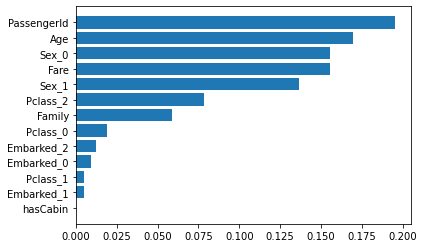

In [46]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.show()

In [47]:
#Figure above sugests that some of the features are of little to no importance so i will remove them:
importances

array([0.19500766, 0.16956328, 0.15552472, 0.        , 0.05893882,
       0.01934614, 0.00491203, 0.07847361, 0.15572388, 0.13622041,
       0.0091119 , 0.0047063 , 0.01247124])

In [48]:
[col_names[i] for i in idxs]

['hasCabin',
 'Embarked_1',
 'Pclass_1',
 'Embarked_0',
 'Embarked_2',
 'Pclass_0',
 'Family',
 'Pclass_2',
 'Sex_1',
 'Fare',
 'Sex_0',
 'Age',
 'PassengerId']

In [49]:
#put into func:

#to demonstrate how to use sklearn to only select the most important models:
from sklearn.feature_selection import SelectFromModel

#we already have x, y, col_names:
model = RandomForestRegressor()

#slect from model all params over a ceratn threshold
sfm = SelectFromModel(estimator=model, threshold=0.05)
x_transformed = sfm.fit_transform(x, y)

#see what we selcted:
support = sfm.get_support()

#support is just an array of true and false so to see what has been selcted:
transformed_col_names = [x for x, y in zip(col_names, support) if y == True]
transformed_col_names

['PassengerId', 'Age', 'Fare', 'Family', 'Pclass_2', 'Sex_0', 'Sex_1']

In [50]:
#changing the test data
test_df = test_df[transformed_col_names]
test_df

,PassengerId,Age,Fare,Family,Pclass_2,Sex_0,Sex_1
0,892,34.50000,7.8292,0,1.0,0.0,1.0
1,893,47.00000,7.0000,1,1.0,1.0,0.0
2,894,62.00000,9.6875,0,0.0,0.0,1.0
3,895,27.00000,8.6625,0,1.0,0.0,1.0
4,896,22.00000,12.2875,2,1.0,1.0,0.0
...,...,...,...,...,...,...,...
413,1305,30.27259,8.0500,0,1.0,0.0,1.0
414,1306,39.00000,108.9000,0,0.0,1.0,0.0
415,1307,38.50000,7.2500,0,1.0,0.0,1.0
416,1308,30.27259,8.0500,0,1.0,0.0,1.0


In [51]:
new_data = pd.DataFrame(x_transformed, columns=transformed_col_names)
new_data['Survived'] = y

In [52]:

new_data


,PassengerId,Age,Fare,Family,Pclass_2,Sex_0,Sex_1,Survived
0,1.0,22.000000,7.2500,1.0,1.0,0.0,1.0,0
1,2.0,38.000000,71.2833,1.0,0.0,1.0,0.0,1
2,3.0,26.000000,7.9250,0.0,1.0,1.0,0.0,1
3,4.0,35.000000,53.1000,1.0,0.0,1.0,0.0,1
4,5.0,35.000000,8.0500,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
884,887.0,27.000000,13.0000,0.0,0.0,0.0,1.0,0
885,888.0,19.000000,30.0000,0.0,0.0,1.0,0.0,1
886,889.0,29.642093,23.4500,3.0,1.0,1.0,0.0,0
887,890.0,26.000000,30.0000,0.0,0.0,0.0,1.0,1


In [54]:
#I am getting the data from the notebooks file then passing it to this notebook to then get the most important features and put back into the training loop.
new_data.to_csv(
    '/Users/ethan/Desktop/Ethan/Python/ML/framework/input/titanic/processed_train.csv', index=False
    )
test_df.to_csv(
    '/Users/ethan/Desktop/Ethan/Python/ML/framework/input/titanic/processed_test.csv', index=False
    )